In [880]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from load_stats_func import load_NBA_stats

In [881]:
target_col = 'Pos'

df_train, df_test = load_NBA_stats(split_test=True, split_test_elements=15)

df_train, df_test = df_train.drop(['Tm'], axis=1), df_test.drop(['Tm'], axis=1)
df_train = df_train.drop(df_train[df_train['G'] < 10].index, axis=0).reset_index(drop=True)

df_train

,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2022/23 Salary
0,Precious Achiuwa,C,23,44,11,22.0,3.6,7.5,0.476,0.5,...,1.9,4.3,6.1,1.0,0.6,0.6,1.2,2.0,9.4,2840160
1,Steven Adams,C,29,42,42,27.0,3.7,6.3,0.597,0.0,...,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,17926829
2,Bam Adebayo,C,25,64,64,35.1,8.3,15.4,0.541,0.0,...,2.4,7.0,9.4,3.3,1.2,0.8,2.6,2.9,21.0,30351780
3,Ochai Agbaji,SG,22,45,8,17.3,2.0,4.6,0.440,1.1,...,0.6,1.1,1.8,0.7,0.2,0.2,0.4,1.5,5.7,3918360
4,Santiago Aldama,PF,22,63,18,22.1,3.3,7.0,0.475,1.3,...,1.0,3.6,4.6,1.2,0.6,0.7,0.7,1.9,9.3,2094120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,Grant Williams,PF,24,65,21,27.0,2.8,6.1,0.455,1.5,...,1.1,3.6,4.8,1.8,0.6,0.4,1.1,2.6,8.4,4306281
437,Jalen Williams,SG,21,61,48,29.6,5.3,10.1,0.524,1.0,...,1.0,3.2,4.2,3.1,1.4,0.5,1.6,2.5,13.3,4341480
438,Jaylin Williams,PF,20,35,22,17.7,2.1,4.7,0.442,0.9,...,0.9,3.9,4.7,1.5,0.4,0.3,0.7,2.1,5.7,2000000
439,Kenrich Williams,PF,28,53,10,22.8,3.4,6.5,0.517,0.9,...,1.8,3.1,4.9,2.0,0.8,0.3,0.6,2.1,8.0,2000000


In [882]:
df_train, df_test = df_train.drop(['Player', 'G', 'GS'], axis=1), df_test.drop(['Player', 'G', 'GS'], axis=1)



In [883]:
dict_imputation = dict()

for col in df_train.columns:
    if col == target_col or col == 'Player':
        continue
    dict_imputation[col] = round(df_train[col].mean(),3)
    df_train[col].fillna(dict_imputation[col],inplace=True)
    df_test[col].fillna(dict_imputation[col],inplace=True)

In [884]:
dict_imputation

{'Age': 25.889,
 'MP': 21.086,
 'FG': 3.596,
 'FGA': 7.641,
 'FG%': 0.469,
 '3P': 1.075,
 '3PA': 2.99,
 '3P%': 0.332,
 '2P': 2.524,
 '2PA': 4.65,
 '2P%': 0.535,
 'eFG%': 0.539,
 'FT': 1.578,
 'FTA': 2.018,
 'FT%': 0.756,
 'ORB': 0.904,
 'DRB': 2.857,
 'TRB': 3.761,
 'AST': 2.175,
 'STL': 0.643,
 'BLK': 0.402,
 'TOV': 1.184,
 'PF': 1.799,
 'PTS': 9.841,
 '2022/23 Salary': 9485905.234}

In [885]:
dict_normalize = dict()
for col in df_train.columns:
    if col == target_col or col == 'Player':
        continue
    dict_normalize[col] = (df_train[col].min(),df_train[col].max())
    df_train[col] = df_train[col].apply(lambda x : (x - dict_normalize[col][0])/(dict_normalize[col][1] - dict_normalize[col][0]))
    df_test[col] = df_test[col].apply(lambda x : (x - dict_normalize[col][0])/(dict_normalize[col][1] - dict_normalize[col][0]))
dict_normalize

{'Age': (19, 38),
 'MP': (2.5, 37.5),
 'FG': (0.2, 11.3),
 'FGA': (0.6, 22.6),
 'FG%': (0.15, 0.828),
 '3P': (0.0, 5.0),
 '3PA': (0.0, 11.5),
 '3P%': (0.0, 1.0),
 '2P': (0.0, 10.2),
 '2PA': (0.2, 17.7),
 '2P%': (0.0, 0.828),
 'eFG%': (0.15, 0.85),
 'FT': (0.0, 10.2),
 'FTA': (0.0, 12.7),
 'FT%': (0.0, 1.0),
 'ORB': (0.0, 5.1),
 'DRB': (0.2, 9.7),
 'TRB': (0.4, 12.4),
 'AST': (0.0, 10.8),
 'STL': (0.0, 2.0),
 'BLK': (0.0, 3.2),
 'TOV': (0.0, 3.9),
 'PF': (0.1, 3.9),
 'PTS': (0.4, 33.4),
 '2022/23 Salary': (260295, 48070014)}

In [886]:
df_train

,Pos,Age,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2022/23 Salary
0,C,0.210526,0.557143,0.306306,0.313636,0.480826,0.10,0.165217,0.256,0.303922,...,0.372549,0.431579,0.475000,0.092593,0.30,0.18750,0.307692,0.500000,0.272727,0.053961
1,C,0.526316,0.700000,0.315315,0.259091,0.659292,0.00,0.000000,0.000,0.362745,...,1.000000,0.663158,0.925000,0.212963,0.45,0.34375,0.487179,0.578947,0.248485,0.369518
2,C,0.315789,0.931429,0.729730,0.672727,0.576696,0.00,0.017391,0.083,0.813725,...,0.470588,0.715789,0.750000,0.305556,0.60,0.25000,0.666667,0.736842,0.624242,0.629401
3,SG,0.157895,0.422857,0.162162,0.181818,0.427729,0.22,0.260870,0.366,0.098039,...,0.117647,0.094737,0.116667,0.064815,0.10,0.06250,0.102564,0.368421,0.160606,0.076513
4,PF,0.157895,0.560000,0.279279,0.290909,0.479351,0.26,0.321739,0.359,0.196078,...,0.196078,0.357895,0.350000,0.111111,0.30,0.21875,0.179487,0.473684,0.269697,0.038357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,PF,0.263158,0.700000,0.234234,0.250000,0.449853,0.30,0.321739,0.404,0.127451,...,0.215686,0.357895,0.366667,0.166667,0.30,0.12500,0.282051,0.657895,0.242424,0.084627
437,SG,0.105263,0.774286,0.459459,0.431818,0.551622,0.20,0.234783,0.349,0.421569,...,0.196078,0.315789,0.316667,0.287037,0.70,0.15625,0.410256,0.631579,0.390909,0.085363
438,PF,0.052632,0.434286,0.171171,0.186364,0.430678,0.18,0.182609,0.411,0.117647,...,0.176471,0.389474,0.358333,0.138889,0.20,0.09375,0.179487,0.526316,0.160606,0.036388
439,PF,0.473684,0.580000,0.288288,0.268182,0.541298,0.18,0.217391,0.373,0.235294,...,0.352941,0.305263,0.375000,0.185185,0.40,0.09375,0.153846,0.526316,0.230303,0.036388


In [887]:
def knn_class(df_train, k, target_col,observation, use_weighted_vote ):
   validation = df_train[target_col].copy()
   train = df_train.drop([target_col], axis=1)
   observed_clean = observation.drop([target_col])
   norms = np.linalg.norm((train-observed_clean).astype(float), axis=1)
   idx = np.argpartition(norms,k)[:k]
   if use_weighted_vote:
      weighted_sum = {key: 0 for key in validation.value_counts().index}
      weights = 1/(norms**2)
      for i in idx:
         weighted_sum[validation[i]] += weights[i]
      return max(weighted_sum, key=weighted_sum.get)
   nearest_types = validation.take(idx)
   return nearest_types.mode()[0]

In [888]:
poss_k = [1,3,7,11,13,15,17,23,29,35,45,75] # possible k's
acc_k_majority = list(np.zeros(len(poss_k))) # Accuracy for each value of k using majority voting
acc_k_weighted = list(np.zeros(len(poss_k))) # Accuracy for each value of k using weighted voting

def get_acc(s_1, s_2):
    return sum(s_1 == s_2)/len(s_1)

for j, k in enumerate(poss_k):
    majority_predicitons = np.array([])
    weighted_predictions = np.array([])
    for i in range(len(df_test)):
        majority_predicitons = np.append(majority_predicitons,knn_class(df_train, k, target_col,df_test.iloc[i], False))
        weighted_predictions = np.append(weighted_predictions,knn_class(df_train, k,target_col,df_test.iloc[i], True))
    acc_k_majority[j] = get_acc(majority_predicitons,df_test[target_col])
    acc_k_weighted[j] = get_acc(weighted_predictions,df_test[target_col])

# print(acc_k_majority)
print(acc_k_weighted)
# x, y = load_NBA_stats(split_test=True, split_test_elements=10)
# y



[0.7333333333333333, 0.5333333333333333, 0.7333333333333333, 0.6, 0.6, 0.6, 0.6, 0.5333333333333333, 0.6666666666666666, 0.7333333333333333, 0.6666666666666666, 0.5333333333333333]


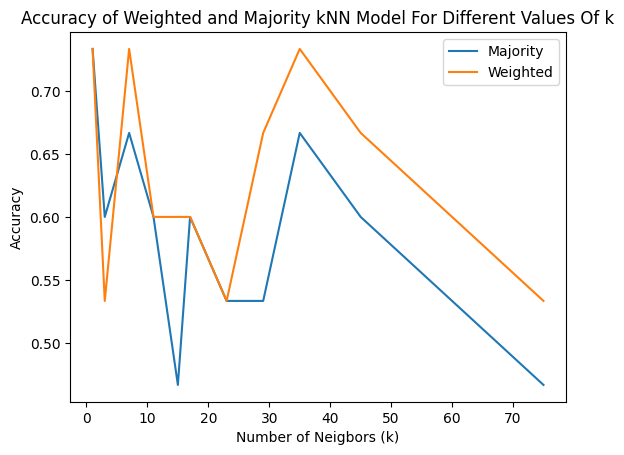

In [889]:
plt.plot(poss_k,acc_k_majority, label='Majority')
plt.plot(poss_k,acc_k_weighted,label='Weighted')
plt.xlabel('Number of Neigbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy of Weighted and Majority kNN Model For Different Values Of k')
plt.legend()
plt.show()